# Credit Card Fraud Detection
Author: Brenda De Leon
## Business Problem

Banks can loose customers and money/x when fraudulent credit card transactions are not detected.

Preventing fraud transactions from going undetected.
E-commerce surged during the pandemic. We are now more reliant on the ease that
e-commerce has brought to our everyday life.
Retailers are capitalizing on the convenience economy of online shopping, and finding
new ways to keep up with the demand.
Unfortunately, there has also been an increase in successful fraud attempts for smaller
and larger retailers and with that an increase in financial losses.
Retailers can prevent such large losses by having data based fraud prevention
strategies.
Target audience: Retailers

##### Defining Credit Card Fraud
We define credit card fraud as

## Data
The credit card transaction dataset we used can be obtained [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=relevance). The dataset contains online transactions made in September 2013 over two days using European credit cards. The transactions are labeled as either fraudulent or non-fraudulent.

<b>Acknowledgements:</b> The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the [DefeatFraud](https://mlg.ulb.ac.be/wordpress/portfolio_page/defeatfraud-assessment-and-validation-of-deep-feature-engineering-and-learning-solutions-for-fraud-detection/) project
##### Data Limitations
2013, 

### Libraries

In [71]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.style.use('ggplot')

In [37]:
# importing dataset
df = pd.read_csv('data/creditcard.csv')
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Duplicates

In [39]:
# checking for duplicates and df shape 
print(df.duplicated().sum())
df.shape

1081


(284807, 31)

In [41]:
# inspecting duplicate rows
df.loc[df.duplicated(keep=False)]

In [40]:
# dropping the duplicates
df.drop_duplicates(subset=None, inplace=True)
# checking for duplicates and df shape 
print(df.duplicated().sum())
df.shape

0


(283726, 31)

It seems the duplicates are not intentional. 

<b>Notes:</b> There are 284,807 rows and 31 columns. The dataset is made up of only numerical features. There are no null values to deal with. 'Amount', 'Class', and 'Time' seem straight forward. However, there are 28 columns (V1 - V28) where more details about the data are not readily available as they likely represent sensitive information. We will further investigate what information these columns represent. From the datasource we know that these 28 features are the principle components obtained by PCA. 

PCA
Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

PCA is all about taking all factors combining them in a smart way and producing new factors that are 1: Uncorrealated with each other. 2: Are ranked from most important to least important. These new factors produced by PCA are called Principle Components. They are constructed in such a way that if you restrict your attention to the first few components only you would still get a good representation of the data. 

PCA — reduce the number of variables of a data set, while preserving as much information as possible.

The dataset is highly imbalanced with only 492 of the total 284,807 transactions labeled as fraudulent. Columns V1 - V28 are 28 of the columns are provided with no labels to protect 

We can still perform  EDA on the dataset and look for relationships. 
Our business problem only cares for detecting fraud, not analyzing the fraud features. 

### Correlation
Checking for multicolinearity amongst the features in the data. 

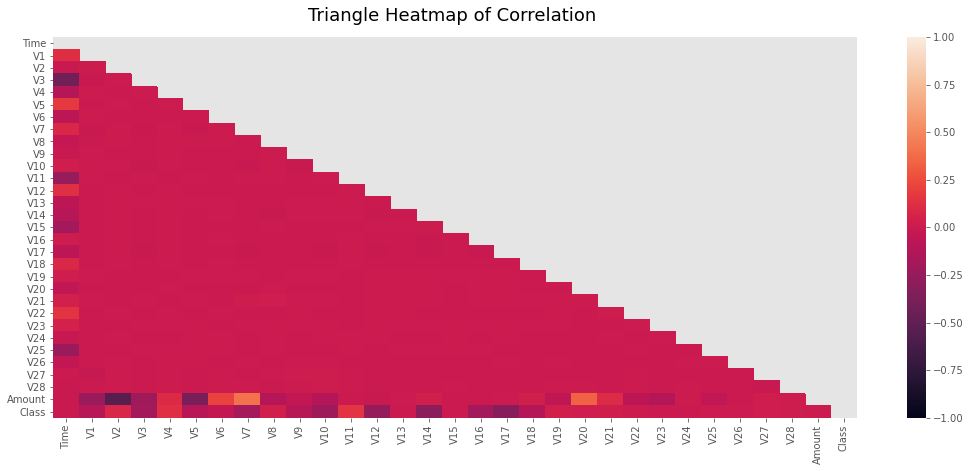

In [45]:
# setting figure size
plt.figure(figsize=(18,7))
# creating heatmap 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, linecolor='black')
heatmap.set_title('Triangle Heatmap of Correlation ', fontdict={'fontsize':18}, pad=16);

With no significantly lighter box in the correalation heatmap, we are interpreting that there is no multicolinearity or strong correalation amongst the features in the dataset. 

### Target

In [46]:
# checking proportions of target
df.Class.value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [56]:
# creating seperate dataframes for fraudulent and non fraudulent transactions
data_fraud = df[df['Class'] == 1]
# non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

In [48]:
# there is high imbalance in our target
print("Fraudulent Transactions: " + str(len(data_fraud)))
print("Non-Fraudulent Transactions: " + str(len(data_non_fraud)))
print("Proportion of Fraudulent Cases: " + str(len(data_fraud)/ df.shape[0]))

Fraudulent Transactions: 473
Non-Fraudulent Transactions: 283253
Proportion of Fraudulent Cases: 0.001667101358352777


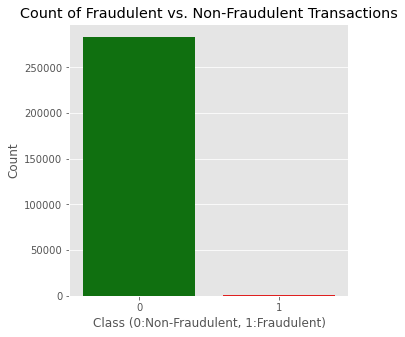

In [49]:
# visually comparing number of fraud and normal transactions 
counts = df.Class.value_counts()
# use green for bar with max value and red for minority
color = ['red' if (x < max(counts)) else 'green' for x in counts]
# setting figure size
plt.figure(figsize=(5,5))
# create barplot using specified colors
sns.barplot(x=counts.index, y=counts, palette=color)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)');

We are dealing with a target that is heavily imbalanced with only 0.0017% of the transactions designated as fraud. We will first focus on and explore the two features not produced by PCA: 'Time' and 'Amount'

### Time
Defined as: 
"Number of seconds elapsed between this transaction and the first transaction in the dataset"

The values are in seconds, the higher the second amount, the further away the transaction took place from the first transaction.

3600
1 hour = 3600 seconds

24 hours = 86400 seconds

In [50]:
df.Time.value_counts()

3767.0      21
3770.0      20
3750.0      19
19912.0     19
3766.0      17
            ..
4919.0       1
119950.0     1
56235.0      1
93647.0      1
151841.0     1
Name: Time, Length: 124592, dtype: int64

In [51]:
# 1 hour = 3600 seconds
# (max time value / seconds in an hour) for number of hours elapsed since first transaction
df.Time.max()/3600

47.99777777777778

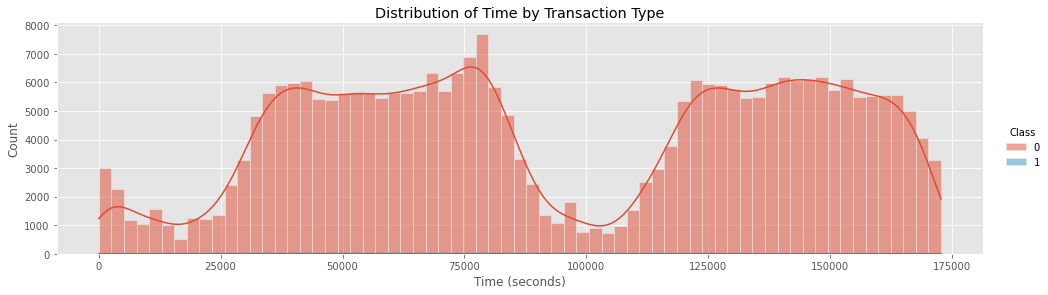

In [52]:
# visually inspecting distribution of time by transaction type
sns.displot(data=df, 
            x='Time', 
            hue='Class', 
            kde=True, 
            fill=True, 
            height=4, 
            aspect=3.5).set(title='Distribution of Time by Transaction Type').set(xlabel='Time (seconds)');

#### Adding Feature: Hour
We will create a new column to represent the hour the transaction took place. Currently the transaction time is represented in seconds. We will see if more patterns can be picked up by including an hour representation for easier reference.

In [69]:
# applying lambda function to each variable of time column to create a new hour column
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

In [65]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 541 to 281674
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    473 non-null    float64
 1   V1      473 non-null    float64
 2   V2      473 non-null    float64
 3   V3      473 non-null    float64
 4   V4      473 non-null    float64
 5   V5      473 non-null    float64
 6   V6      473 non-null    float64
 7   V7      473 non-null    float64
 8   V8      473 non-null    float64
 9   V9      473 non-null    float64
 10  V10     473 non-null    float64
 11  V11     473 non-null    float64
 12  V12     473 non-null    float64
 13  V13     473 non-null    float64
 14  V14     473 non-null    float64
 15  V15     473 non-null    float64
 16  V16     473 non-null    float64
 17  V17     473 non-null    float64
 18  V18     473 non-null    float64
 19  V19     473 non-null    float64
 20  V20     473 non-null    float64
 21  V21     473 non-null    float64
 2

We will visualize the times of the transactions over hours instead of seconds. We can do this by setting the bins to 48, equivalent to the 48 hour span the transactions took place.

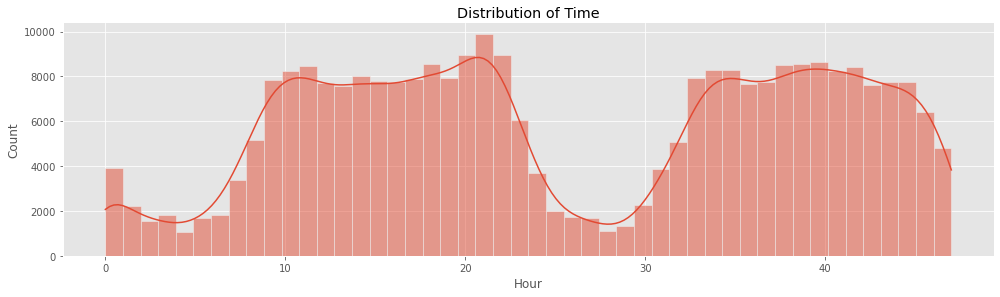

In [59]:
# visually inspecting time
sns.displot(df.Hour, 
            height=4, 
            aspect=3.5, 
            kde=True,
            bins=48).set(title='Distribution of Time');

<b>Notes:</b> The transactioon times represented in hours is more accesible. We can see that the dips occur in the early morning hours and late night hours. The hihghest mIt is easier to 

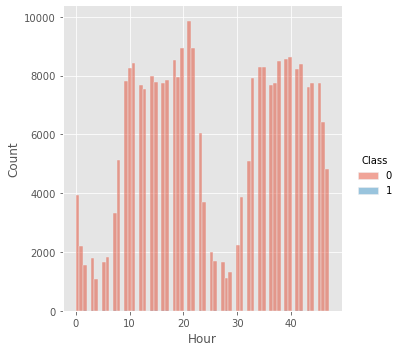

In [73]:
sns.displot(df, x="Hour", hue="Class")

In [72]:
# creating seperate dataframes for fraudulent and non fraudulent transaction hours
hour_0 = df.loc[df['Class'] == 0]['Hour']
hour_1 = df.loc[df['Class'] == 1]['Hour']
hist_data = [hour_0, hour_1]
group_labels = ['Not Fraud', 'Fraud']


fig = ff.create_displot(hist_data, group_labels, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))

AttributeError: module 'plotly.figure_factory' has no attribute 'create_displot'

In [ ]:
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

In [ ]:
class_0 = data_df.loc[data_df['Class'] == 0]["Time"]
class_1 = data_df.loc[data_df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')


# creating seperate dataframes for fraudulent and non fraudulent transactions
data_fraud = df[df['Class'] == 1]
# non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

other graph options: 
    time with only fraud
    time with only non fraud
    displot with fraud_data and non_fraud_data
    
def by hours.
further engineer to see if day or not


In [69]:
# distribution summary of the time feature  
pd.set_option('precision', 3)
print('Summary of: TIME' + '\n----------------------------')
print(df['Time'].describe())

Summary of: TIME
----------------------------
count    284807.000
mean      94813.860
std       47488.146
min           0.000
25%       54201.500
50%       84692.000
75%      139320.500
max      172792.000
Name: Time, dtype: float64


<b>Notes:</b>

### Amount

Defined as: "Transaction amount"

In [12]:
df.Amount.value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

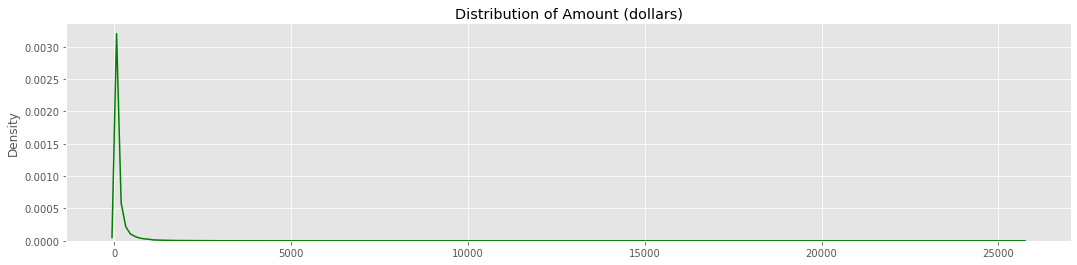

In [13]:
# visually inspecting amount
f, axes = plt.subplots(1, 1, figsize=(18,4))

amount_values = df['Amount'].values # values

sns.kdeplot(amount_values, color='g').set_title('Distribution of Amount (dollars)')
plt.show();

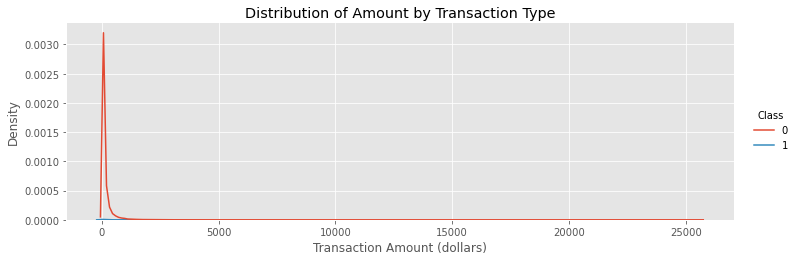

In [60]:
# visually inspecting distribution of amount by transaction type
sns.displot(data=df, 
            x='Amount', 
            hue='Class', 
            kind="kde", 
            height=3.5, 
            aspect=3).set(title='Distribution of Amount by Transaction Type').set(xlabel='Transaction Amount (dollars)');

other graph options: 
    amount with only fraud
    amount with only non fraud
    displot with fraud_data and non_fraud_data
    box plot to view outliers
    
    Let us try to visualize the count of transactions over hours. We will first do it for the entire dataset and then split it between fraudulent users and non-fraudulent users-
    

In [70]:
# distribution summary of the amount feature  
pd.set_option('precision', 3)
print('Summary of: AMOUNT' + '\n----------------------------')
print(df['Amount'].describe())

Summary of: AMOUNT
----------------------------
count    284807.000
mean         88.350
std         250.120
min           0.000
25%           5.600
50%          22.000
75%          77.165
max       25691.160
Name: Amount, dtype: float64


In [72]:
# calculating average of all transactions
print("Average Fraudulent Transaction Amount:  $ " + str('%.4f' % data_fraud['Amount'].mean()))
print("Average Valid Transaction Amount:  $ " + str('%.4f' % data_non_fraud['Amount'].mean()))
print("Average Transaction Amount:  $ " + str('%.4f' % df['Amount'].mean()))

Average Fraudulent Transaction Amount:  $ 122.2113
Average Valid Transaction Amount:  $ 88.2910
Average Transaction Amount:  $ 88.3496


<b>Notes:</b> The average fradulent transaction amount at 122.21 is higher than the average non-fradulent transaction amount of 88.29. This highlights the importantance of detecting fraud transactions. The presence of the fradulent transactions causes the average transaction amount to increase. 

## Other Features
The other 28 features are principal compoenents. Visualize their distributions also by transaction type. 

In [107]:
# visually inspect 28 other features 
data_plot = df.copy()
# specify columns to use
columns = data_plot.iloc[:,1:29].columns
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
# plot the distributions of remaining features # from stackoverflow
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(15, 7), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D

for col, ax in zip(columns, axes):
    data = df[[col, 'class']]  # select the data
    sns.kdeplot(data=data, x=col, hue='class', shade=True, ax=ax)
    ax.set(title=f'Distribution of Feature: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

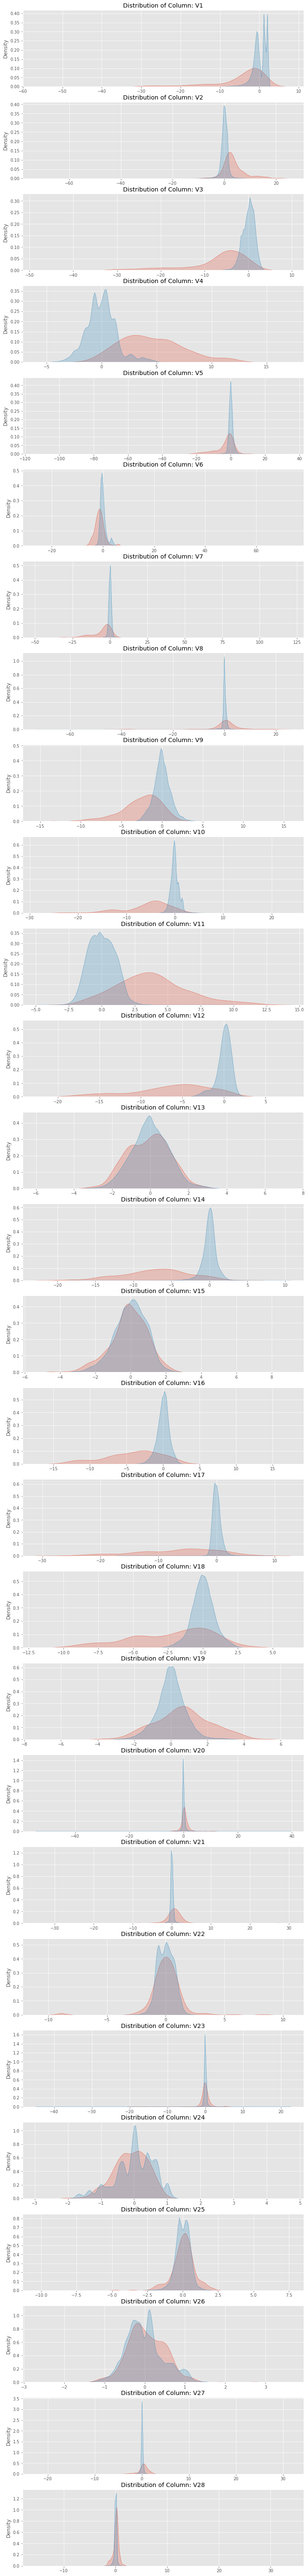

In [108]:
# plot the distributions of remaining features
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

<b>Notes:</b> skewness


 - remove amount outliers?

In [ ]:
- tsne 

In [ ]:
save df as new cvs w new hour column.

- next step?

- oversampling, smote, scaling, or removing outliers, or weighing? best method to deal with severe imbalance (and why) 

### Time and Amount

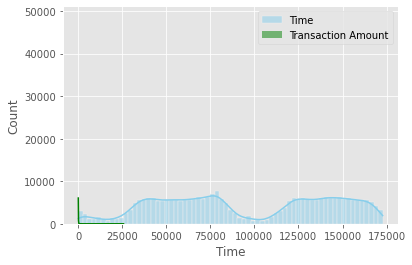

In [62]:
sns.histplot(data=df, x='Time', color="skyblue", label='Time', kde=True)
sns.histplot(data=df, x='Amount', color='green', label='Transaction Amount', kde=True)

plt.legend() 
plt.show()

In [11]:
# proportion summaries of select columns we will work with
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


notes to think about: delete only nonfraud duplicates? since we are already creating synthetic data?
